# COURSE: A deep understanding of deep learning
## SECTION: Convolution and transformations
### LECTURE: Image transformations
#### TEACHER: Mike X Cohen, sincxpress.com
##### COURSE URL: udemy.com/course/deeplearning_x/?couponCode=202401
##### Modified from original code

In [1]:
# import libraries
import numpy as np
import torch 

# NEW!
import torchvision
import torchvision.transforms as T

import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

# Import a dataset

In [ ]:
# The list of datasets that come with torchvision: https://pytorch.org/vision/stable/index.html

In [6]:
# import the CIFAR10 dataset bc we have already downloaded it from previous lectures
cdata = torchvision.datasets.CIFAR10(root='../12-data/cifar10')

print(cdata)

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ../12-data/cifar10
    Split: Train


In [10]:
# check out the shape of the dataset
print( cdata.data.shape )

# the unique categories/labels
print( cdata.classes )

# .targets is a list of targets/labels converted to ints
print( len(cdata.targets) )

(50000, 32, 32, 3)
['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
50000


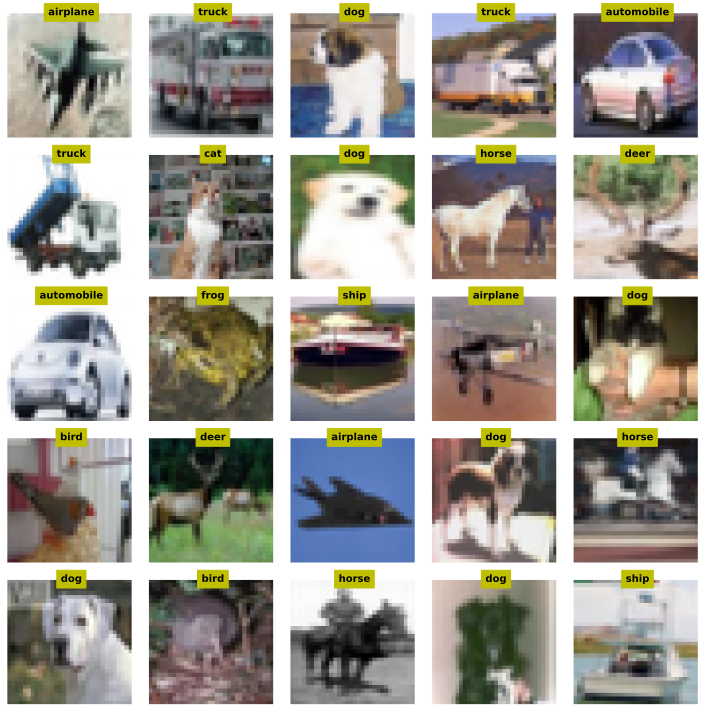

In [11]:
# inspect a few random images

fig,axs = plt.subplots(5,5,figsize=(10,10))

for ax in axs.flatten():

  # select a random picture
  randidx = np.random.choice(len(cdata.targets))

  # extract that image
  pic = cdata.data[randidx,:,:,:]
  # and its label
  label = cdata.classes[cdata.targets[randidx]]

  # and show!
  ax.imshow(pic)
  ax.text(16,0,label,ha='center',fontweight='bold',color='k',backgroundcolor='y')
  ax.axis('off')

plt.tight_layout()
plt.show()
#u can see these images are very low-resolution

# Apply some Transformations in PyTorch

In [13]:
# Group multiple image transformations to one object
# concept similar to nn.Sequential
Ts = T.Compose([ T.ToTensor(), #convert numpy data to tensor format in the range of [0.0,1.0]
                 T.Resize(32*4), #increase image resolution by 4
                 T.Grayscale(num_output_channels=1) #convert image to grayscale
               ])

# add/include the transform in the dataset
cdata.transform = Ts

# Important! Adding a transform doesn't change the image data:
# it is not (1,128,128)
print(cdata.data[123,:,:,:].shape)

# you can also apply the transforms immediately when loading in the data
# cdata = torchvision.datasets.CIFAR10(root='../12-data/cifar10', transform=Ts)

(32, 32, 3)


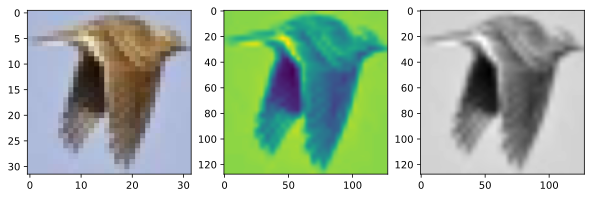

torch.Size([1, 128, 128])

In [15]:
# apply the transform

# option 1a: apply the transform "externally" to an image
# just like yhat = net(x)
img1 = Ts( cdata.data[123,:,:,:] )

# option 1b: use the embedded transform
img2 = cdata.transform( cdata.data[123,:,:,:] )

# let's see what we've done!
fig,ax = plt.subplots(1,3,figsize=(10,3))
ax[0].imshow(cdata.data[123,:,:,:])
ax[1].imshow(torch.squeeze(img1)) #default cmap=verdana
ax[2].imshow(torch.squeeze(img2),cmap='gray') #so we need to apply cmap explicitly

plt.show()

In [ ]:
# Note about ToTensor() and normalization:
??T.ToTensor()

# Additional explorations

In [ ]:
# 1) There are many other transforms available in torchvision: https://pytorch.org/vision/stable/transforms.html
#    Many transformations are useful for data preparation and augmentation. We'll cover some of them later in the course,
#    but for now, read about RandomCrop(), RandomHorizontalFlip(), and CenterCrop(). Then implement them to understand 
#    what they do to images.
#    Tip: It's probably best to test these transforms separately, and on one test image, as we did above.
# 